 Data cleaning and modelling

• Provide an environment (Database if possible) to connect Tableau to

• Answer the following questions

• What Categories/Subcategories are projected to grow the fastest in the next 5 years?

• Within these Categories/Subcategories, what Channels are growing?

• What is Dragonyte’s market position within these fast-growing categories?

• Provide predictions + explanation of the model used

• Give your recommendations to the Dragonyte Board

• Think out of the box! Dare to surprise!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import sklearn
from sklearn.feature_selection import RFE


In [2]:
pd.set_option("display.max_row", 500)
pd.set_option("display.max_columns", 150)

pd.set_option('display.max_colwidth', None)

pd.set_option('display.precision', 2)

pd.set_option('display.float_format', '{:.2f}'.format)


In [3]:
#Market size TAM SAM
df = pd.read_csv('Data/Market_Sizes.csv')

In [4]:
subcategories = pd.read_csv('Data/Subcategories.csv')

In [5]:
df.head()

,Location,Industry,Subcategory,Hierarchy_Level,Data_Type,Unit,Current_Constant,Currency_Conversion,Year,Year_date,RSP,Volume,Year_minus_2016,Year_minus_2022,Edition
0,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2016,31-Dec-16,301.00,27.00,4,-2,2022
1,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2017,31-Dec-17,318.00,28.00,5,-1,2022
2,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2018,31-Dec-18,458.00,40.00,6,0,2022
3,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2019,31-Dec-19,612.00,51.00,7,1,2022
4,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2020,31-Dec-20,774.00,62.00,8,2,2022


In [6]:
df['Subcategory'].unique

<bound method Series.unique of 0        1
1        1
2        1
3        1
4        1
        ..
1216    17
1217    17
1218    17
1219    17
1220    17
Name: Subcategory, Length: 1221, dtype: int64>

In [7]:
df = pd.merge(subcategories, df, left_on='id', right_on='Subcategory', suffixes=('SUBC', '_DF'))


In [8]:
df.shape

(1221, 18)

In [9]:
df.isnull().sum()

id                     0
Category               0
Name                   0
Location               0
Industry               0
Subcategory            0
Hierarchy_Level        0
Data_Type              0
Unit                   0
Current_Constant       0
Currency_Conversion    0
Year                   0
Year_date              0
RSP                    0
Volume                 0
Year_minus_2016        0
Year_minus_2022        0
Edition                0
dtype: int64

In [10]:
print(df.dtypes)


id                       int64
Category                 int64
Name                    object
Location                 int64
Industry                object
Subcategory              int64
Hierarchy_Level          int64
Data_Type               object
Unit                    object
Current_Constant        object
Currency_Conversion     object
Year                     int64
Year_date               object
RSP                    float64
Volume                 float64
Year_minus_2016          int64
Year_minus_2022          int64
Edition                  int64
dtype: object


In [11]:
df['Unit'].unique()


array(['USD million'], dtype=object)

In [12]:
df.drop_duplicates(inplace=True)


In [13]:
df['Data_Type'].unique

<bound method Series.unique of 0       Total Value RSP
1       Total Value RSP
2       Total Value RSP
3       Total Value RSP
4       Total Value RSP
             ...       
1216    Total Value RSP
1217    Total Value RSP
1218    Total Value RSP
1219    Total Value RSP
1220    Total Value RSP
Name: Data_Type, Length: 1221, dtype: object>

In [14]:
df.head()

,id,Category,Name,Location,Industry,Subcategory,Hierarchy_Level,Data_Type,Unit,Current_Constant,Currency_Conversion,Year,Year_date,RSP,Volume,Year_minus_2016,Year_minus_2022,Edition
0,1,1,Ale,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2016,31-Dec-16,301.00,27.00,4,-2,2022
1,1,1,Ale,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2017,31-Dec-17,318.00,28.00,5,-1,2022
2,1,1,Ale,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2018,31-Dec-18,458.00,40.00,6,0,2022
3,1,1,Ale,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2019,31-Dec-19,612.00,51.00,7,1,2022
4,1,1,Ale,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2020,31-Dec-20,774.00,62.00,8,2,2022


In [20]:
df = df.drop(['Year_minus_2022','Year_minus_2016','Edition','Current_Constant','Currency_Conversion','Unit','Data_Type','Year_date'], axis=1)

In [21]:
numerical=df.select_dtypes(include=np.number)
numerical.shape

(1221, 8)

In [22]:
categorical = df.select_dtypes(include=['object', 'category'])
categorical.shape

(1221, 2)

In [23]:
df.columns

Index(['id', 'Category', 'Name', 'Location', 'Industry', 'Subcategory',
       'Hierarchy_Level', 'Year', 'RSP', 'Volume'],
      dtype='object')

<Axes: >

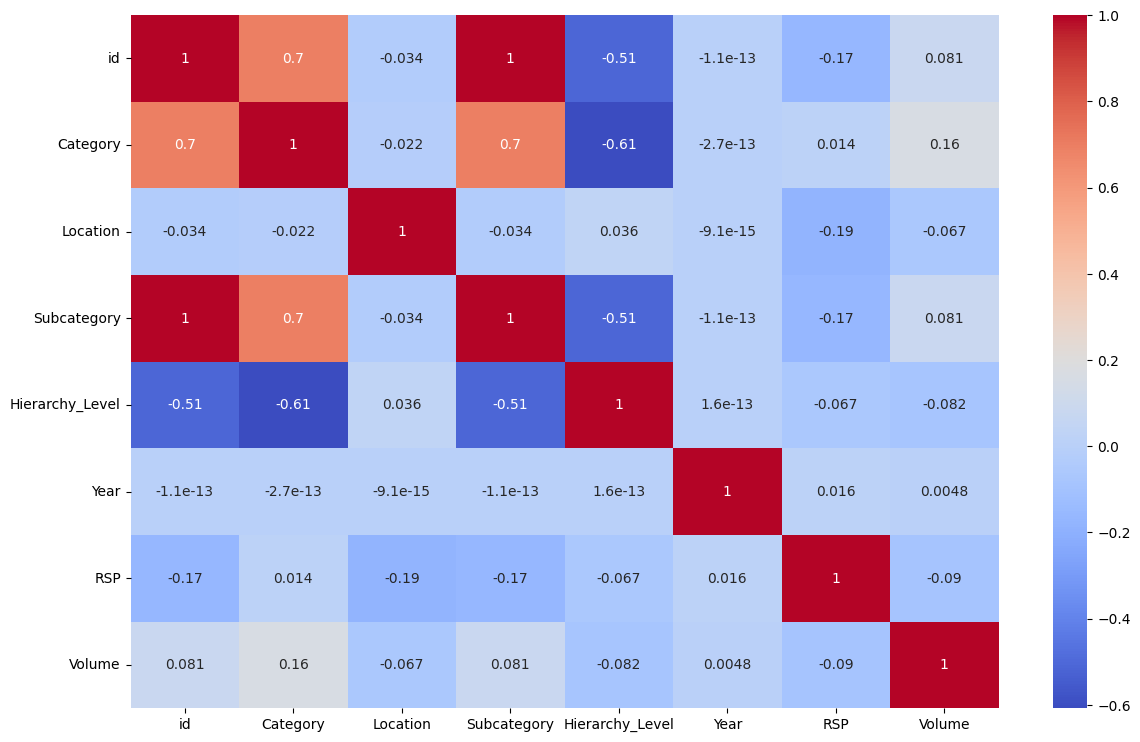

In [25]:
corr = numerical.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [26]:
X = numerical.drop("RSP",axis=1)   #Feature Matrix
y = numerical["RSP"] 

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((854, 7), (367, 7))

In [29]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [30]:
print(model.feature_importances_)


[0.09223456 0.02231359 0.25682689 0.08827141 0.04497571 0.08971439
 0.40566345]


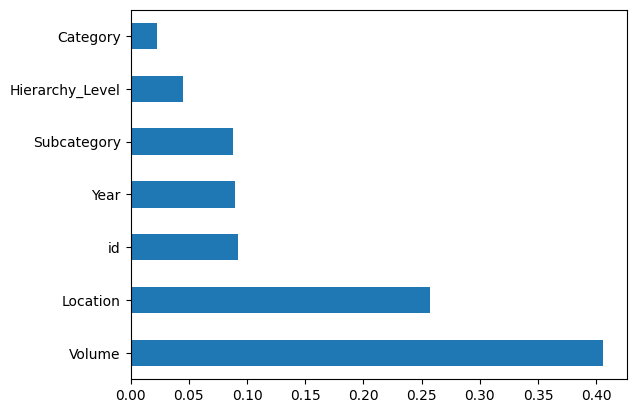

In [31]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [33]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

0


<Axes: xlabel='RSP', ylabel='Year'>

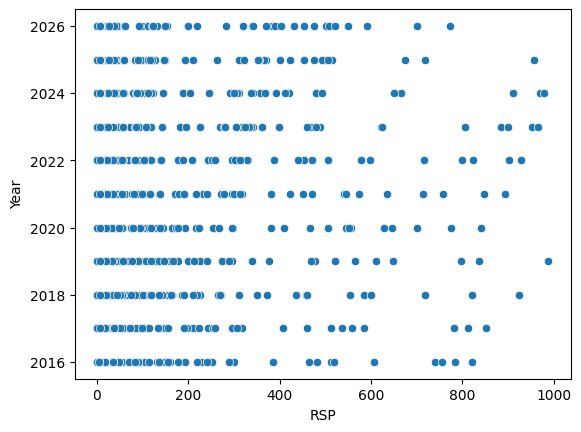

In [41]:


sns.scatterplot(data=df, x='RSP', y='Year')
